In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [40]:
# GitHub에서 데이터 로드
df = pd.read_csv(r'C:\Users\wlsgh\Downloads\인공지능개론\2주차\titanic_processed.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,1,22.000000,1,0,7.2500,146
1,2,1,1,0,38.000000,1,0,71.2833,81
2,3,1,3,0,26.000000,0,0,7.9250,146
3,4,1,1,0,35.000000,1,0,53.1000,55
4,5,0,3,1,35.000000,0,0,8.0500,146
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,146
887,888,1,1,0,19.000000,0,0,30.0000,30
888,889,0,3,0,29.699118,1,2,23.4500,146
889,890,1,1,1,26.000000,0,0,30.0000,60


In [41]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
dtype: int64

In [42]:
# 데이터와 타겟 분리
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

In [43]:

Y = pd.get_dummies(y).values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712, 2), (179, 2))

In [46]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))  
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1381 (5.39 KB)
Trainable params: 1381 (5.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
23/23 [==============================] - 3s 43ms/step - loss: 44.1042 - mse: 44.1042 - val_loss: 10.3088 - val_mse: 10.3088
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 13.1148 - mse: 13.1148 - val_loss: 15.4535 - val_mse: 15.4535
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 13.9546 - mse: 13.9546 - val_loss: 1.5809 - val_mse: 1.5809
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 10.8106 - mse: 10.8106 - val_loss: 5.3617 - val_mse: 5.3617
Epoch 5/10
23/23 [==============================] - 0s 21ms/step - loss: 10.6193 - mse: 10.6193 - val_loss: 4.1679 - val_mse: 4.1679
Epoch 6/10
23/23 [==============================] - 0s 13ms/step - loss: 9.6978 - mse: 9.6978 - val_loss: 1.1961 - val_mse: 1.1961
Epoch 7/10
23/23 [==============================] - 0s 13ms/step - loss: 10.4179 - mse: 10.4179 - val_loss: 11.8395 - val_mse: 11.8395
Epoch 8/10
23/23 [==============================] - 0s 13ms/step 

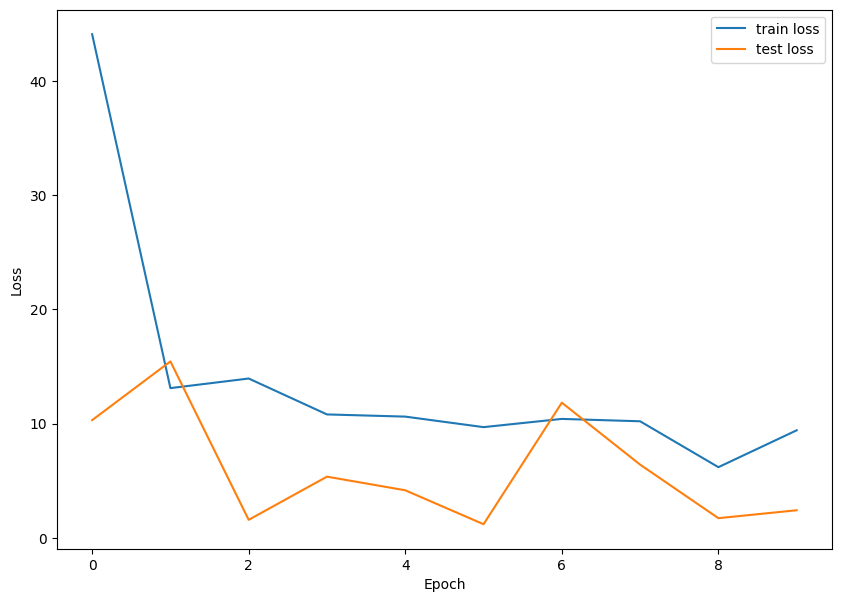

In [48]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 2.4194 - mse: 2.4194


[2.419384241104126, 2.419384241104126]